<a href="https://colab.research.google.com/github/Icyshaman/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing all the essential liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading the files

In [2]:
play_store_data = pd.read_csv('/content/Play Store Data.csv')
user_reviews_data = pd.read_csv('/content/User Reviews.csv')

#Data Exploration

In [3]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
play_store_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
play_store_data.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
user_reviews_data.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [9]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
user_reviews_data.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,"CBS Sports App - Scores, News, Stats & Watch Live",Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


#Checking Null Values

In [11]:
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
user_reviews_data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

#Handling Null Values

In [13]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
play_store_data['Rating'].fillna(play_store_data['Rating'].mean(), \
                                 inplace = True)

In [16]:
play_store_data['Reviews_numeric'] = play_store_data['Reviews'].apply(lambda x: x.replace('M',''))
play_store_data['Reviews_numeric'] = play_store_data['Reviews_numeric'].astype('float64').astype('int64')
reviews = [row[1]['Reviews_numeric'] * 1000000 if row[1]['Reviews'][-1] == 'M' \
           else row[1]['Reviews_numeric'] for row in play_store_data.iterrows()]
play_store_data['Reviews'] = np.array(reviews)
play_store_data.drop(columns=['Reviews_numeric'], inplace = True)

In [17]:
play_store_data['Size'].replace('Varies with device', '0M', inplace = True)
play_store_data['Size_numeric'] = play_store_data['Size'].apply(lambda x:x[:-1])
play_store_data['Size_numeric'] = play_store_data['Size_numeric'].str.replace(',','')
play_store_data['Size_numeric'] = play_store_data['Size_numeric'].astype('float64')
size = [row[1]['Size_numeric'] * 1024 if row[1]['Size'][-1].lower() == 'm' \
        else row[1]['Size_numeric'] for row in play_store_data.iterrows()]
play_store_data['Size'] = np.array(size)
play_store_data.drop(columns=['Size_numeric'], inplace = True)
play_store_data['Size'].replace(0, play_store_data['Size'].mean(), inplace = True)

In [18]:
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x:x.replace('+','').replace(',',''))
play_store_data['Installs'].replace('Free', '0', inplace = True)
play_store_data['Installs'] = play_store_data['Installs'].astype('int64')

In [19]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [20]:
play_store_data.dropna(inplace = True)

In [21]:
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: x.replace('$', ''))
play_store_data['Price'] = play_store_data['Price'].astype('float64')

In [22]:
play_store_data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [23]:
from datetime import datetime
from datetime import timedelta

In [24]:
play_store_data['Last Updated'] = play_store_data['Last Updated'].apply(lambda x : datetime.strptime(x,'%B %d, %Y'))

In [25]:
latest_date = max(play_store_data['Last Updated']) + timedelta(days=10)
play_store_data['Days since last Update'] = play_store_data['Last Updated'] \
                                            .apply(lambda x: (latest_date - x).days)

In [26]:
play_store_data.reset_index(drop = True, inplace = True)

In [27]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     10829 non-null  object        
 1   Category                10829 non-null  object        
 2   Rating                  10829 non-null  float64       
 3   Reviews                 10829 non-null  int64         
 4   Size                    10829 non-null  float64       
 5   Installs                10829 non-null  int64         
 6   Type                    10829 non-null  object        
 7   Price                   10829 non-null  float64       
 8   Content Rating          10829 non-null  object        
 9   Genres                  10829 non-null  object        
 10  Last Updated            10829 non-null  datetime64[ns]
 11  Current Ver             10829 non-null  object        
 12  Android Ver             10829 non-null  object

In [28]:
user_reviews_data.dropna(inplace = True)

In [29]:
user_reviews_data.reset_index(drop = True, inplace = True)

In [30]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


# Correlation

In [31]:
play_store_data.corr()

,Rating,Reviews,Size,Installs,Price,Days since last Update
Rating,1.000000,0.067945,0.070177,0.051126,-0.020193,-0.133466
Reviews,0.067945,1.000000,0.118855,0.643112,-0.009674,-0.085302
Size,0.070177,0.118855,1.000000,0.068556,-0.021652,-0.207422
Installs,0.051126,0.643112,0.068556,1.000000,-0.011698,-0.100931
Price,-0.020193,-0.009674,-0.021652,-0.011698,1.000000,0.006908
Days since last Update,-0.133466,-0.085302,-0.207422,-0.100931,0.006908,1.000000


[]

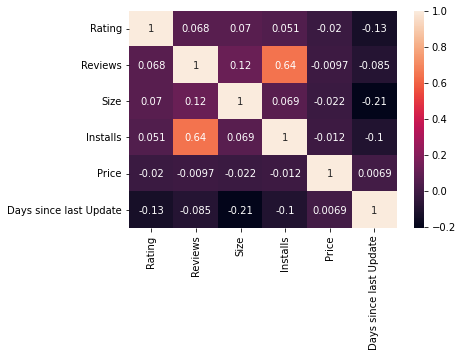

In [32]:
sns.heatmap(play_store_data.corr(), annot = True)
plt.plot()

In [33]:
user_reviews_data.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


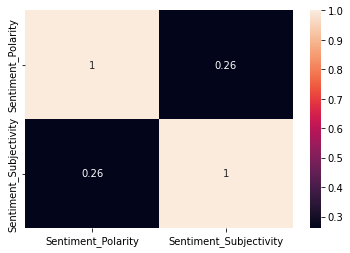

In [34]:
sns.heatmap(user_reviews_data.corr(), annot = True)
plt.show()

#Finding Insights

In [35]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days since last Update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,223
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,215
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,17
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,71
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,59


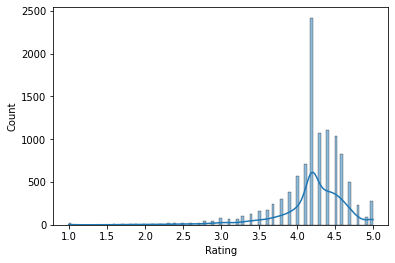

In [36]:
sns.histplot(data=play_store_data, x="Rating", kde=True)
plt.show()

In [37]:
play_store_data['Rating_int'] = play_store_data['Rating'].astype('int64')

In [38]:
rating_range_data = play_store_data.groupby(by='Rating_int') \
                    .agg({'Installs':sum,'App':'size'}).reset_index()
display(rating_range_data)

,Rating_int,Installs,App
0,1,1156475,56
1,2,26581700,231
2,3,9333759600,1710
3,4,158270268579,8558
4,5,90023,274


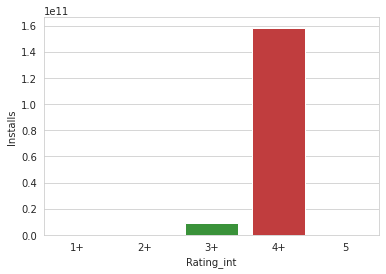

In [39]:
with sns.axes_style("whitegrid"):
  g = sns.barplot(x = 'Rating_int', y = 'Installs', data = rating_range_data, ci = None)
  g.set(xticklabels=['1+','2+','3+','4+',5])
plt.show()

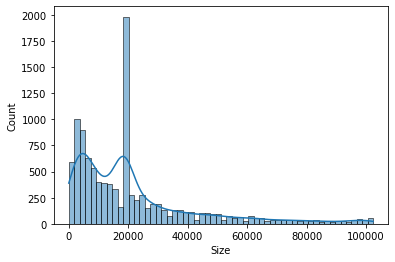

In [40]:
sns.histplot(data = play_store_data, x = 'Size', kde = True)
plt.show()

In [41]:
play_store_data['Size_range_10mb'] = ((play_store_data['Size']/1024)//10).astype('int64')

In [42]:
play_store_data.Size_range_10mb.unique()

array([ 1,  0,  2,  3,  5,  7,  4,  6,  8,  9, 10])

In [43]:
size_range_data = play_store_data.groupby(by='Size_range_10mb') \
                    .agg({'Installs':sum,'App':'size'}).reset_index()
display(size_range_data)

,Size_range_10mb,Installs,App
0,0,4806840519,3906
1,1,116038969582,3397
2,2,6097347240,1231
3,3,4128257882,678
4,4,4929485221,499
5,5,5905493366,346
6,6,7624432601,249
7,7,12855622166,182
8,8,1135579170,130
9,9,3706813130,195


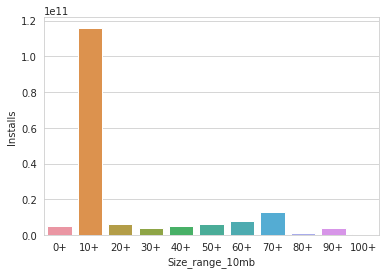

In [44]:
with sns.axes_style("whitegrid"):
  g = sns.barplot(x = 'Size_range_10mb', y = 'Installs', data = size_range_data, ci = None)
  g.set(xticklabels=[str(i*10)+'+' for i in range(11)])
plt.show()

In [45]:
play_store_category = play_store_data.groupby(by='Category') \
                      .agg({'Installs':sum,'App':'size'}) \
                      .sort_values(by = 'Installs', ascending = False) \
                      .reset_index()
display(play_store_category)

,Category,Installs,App
0,GAME,35086024415,1144
1,COMMUNICATION,32647276251,387
2,PRODUCTIVITY,14176091369,424
3,SOCIAL,14069867902,295
4,TOOLS,11452271905,841
5,FAMILY,10258203405,1968
6,PHOTOGRAPHY,10088247655,335
7,NEWS_AND_MAGAZINES,7496317760,283
8,TRAVEL_AND_LOCAL,6868887146,258
9,VIDEO_PLAYERS,6222002720,175


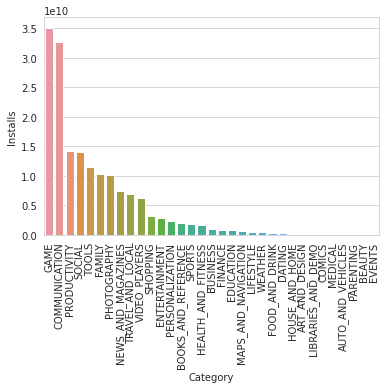

In [46]:
with sns.axes_style("whitegrid"):
  g = sns.barplot(x = 'Category', y = 'Installs', data = play_store_category, ci = None)
  g.tick_params(axis='x', rotation=90)
plt.show()

In [47]:
play_store_content_rating = play_store_data.groupby(by='Content Rating') \
                            .agg({'Installs':sum,'App':'size'}) \
                            .sort_values(by = 'Installs', ascending = False) \
                            .reset_index()
display(play_store_content_rating)

,Content Rating,Installs,App
0,Everyone,114155082511,8704
1,Teen,34716350393,1208
2,Everyone 10+,13233881795,413
3,Mature 17+,5524491178,499
4,Adults only 18+,2000000,3
5,Unrated,50500,2


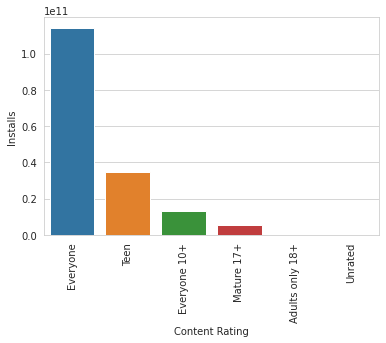

In [48]:
with sns.axes_style("whitegrid"):
  g = sns.barplot(x = 'Content Rating', y = 'Installs', data = play_store_content_rating, ci = None)
  g.tick_params(axis='x', rotation=90)
plt.show()

In [49]:
play_store_data['month since last update'] = (play_store_data['Days since last Update']//30)

In [50]:
play_store_month_range = play_store_data.groupby(by='month since last update') \
                            .agg({'Installs':sum}) \
                            .sort_values(by = 'Installs', ascending = False) \
                            .reset_index()
play_store_month_range.head()

,month since last update,Installs
0,0,108970069020
1,1,35682955524
2,2,9942606262
3,4,2164457359
4,3,2002648841


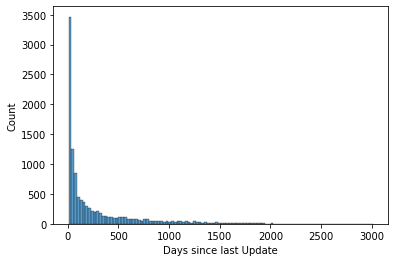

In [51]:
sns.histplot(play_store_data['Days since last Update'])

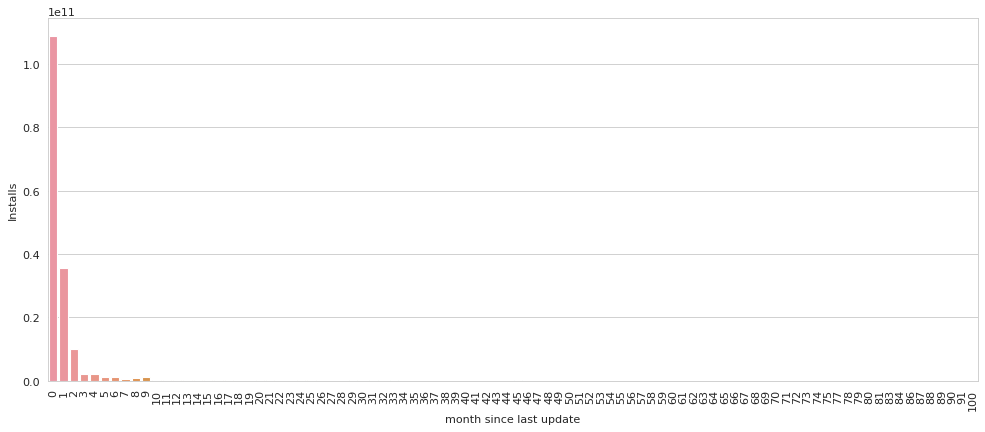

In [52]:
plt.figure(figsize=(15, 6), dpi=80)
with sns.axes_style("whitegrid"):
  g = sns.barplot(x = 'month since last update', y = 'Installs', data = play_store_month_range, ci = None)
  g.tick_params(axis='x', rotation=90)
plt.show()

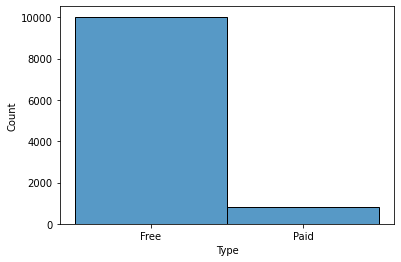

In [53]:
sns.histplot(play_store_data['Type'])

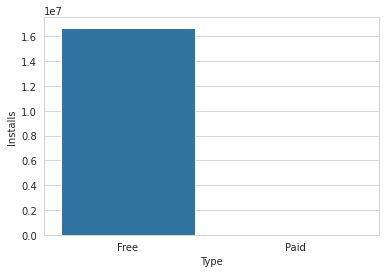

In [54]:
with sns.axes_style("whitegrid"):
  g = sns.barplot(x = 'Type', y = 'Installs', data = play_store_data, ci = None)
plt.show()

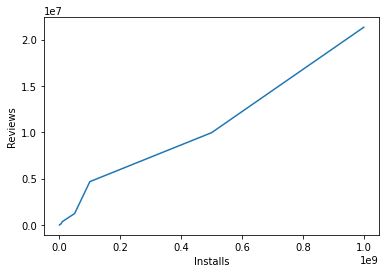

In [55]:
sns.lineplot(y='Reviews', x='Installs', data = play_store_data, ci = None)